In [1]:
#Since the linear regression I did earlier was sensitive to outliers,
#there is an option to make a “random forest”,
#which is less sensitive to outliers and can show better results.

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
uybor = pd.read_csv('/data/uybor_ready.csv')

In [23]:
uybor.drop(columns=['Unnamed: 0'], inplace=True)
uybor.head(10)

,district,rooms,size,level,max_levels,price
0,Yunusobod,3,57.0,4,4,52000
1,Yakkasaroy,2,52.0,4,5,56000
2,Chilonzor,2,42.0,4,4,37000
3,Chilonzor,3,65.0,1,4,49500
4,Chilonzor,3,70.0,3,5,55000
5,Chilonzor,1,28.0,1,4,25500
6,Chilonzor,1,30.0,2,4,21200
7,Yakkasaroy,2,32.0,5,5,20000
8,Uchtepa,2,51.0,3,4,26200
9,Chilonzor,1,30.0,1,4,22200


In [27]:
#need to define feature columns and target column
features = ['district', 'rooms', 'size', 'level', 'max_levels']
target = 'price'

X = uybor[features]
y = uybor[target]

#define categorical and numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['rooms', 'size', 'level', 'max_levels']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['district'])])

In [28]:
#Create a pipeline and RandomForest
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

In [29]:
#splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#model training
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['rooms', 'size', 'level',
                                                   'max_levels']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['district'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [34]:
y_pred = model.predict(X_test)

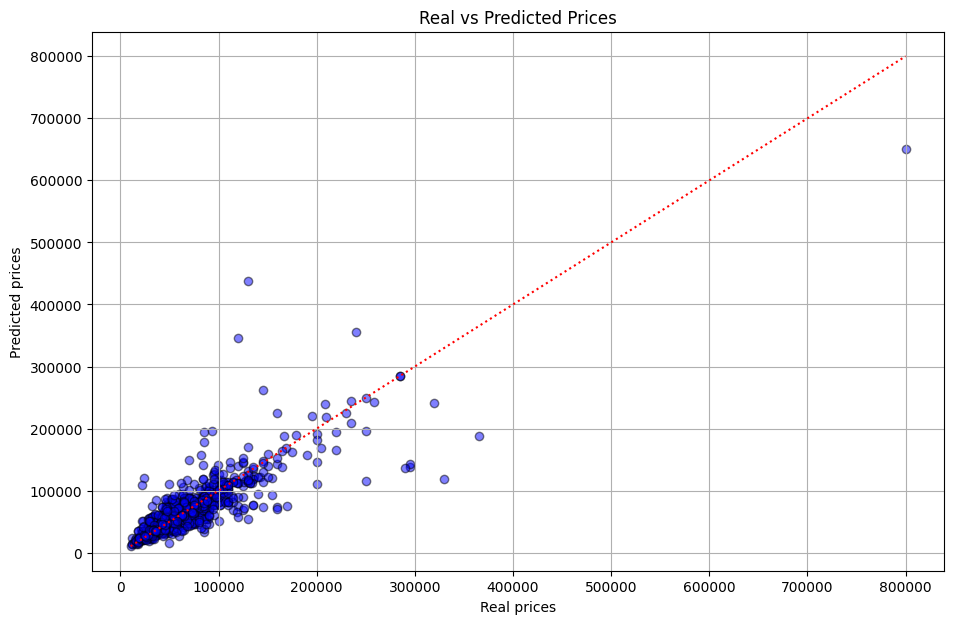

In [44]:
plt.figure(figsize=(11, 7))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dotted')
plt.xlabel('Real prices')
plt.ylabel('Predicted prices')
plt.title('Real vs Predicted Prices')
plt.grid(True)
plt.show()

In [46]:
#model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 489427067.42184037
R^2 Score: 0.7337705501845349


<ipython-input-51-3190eeccc427>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(uybor['price'], shade=True, color='blue')


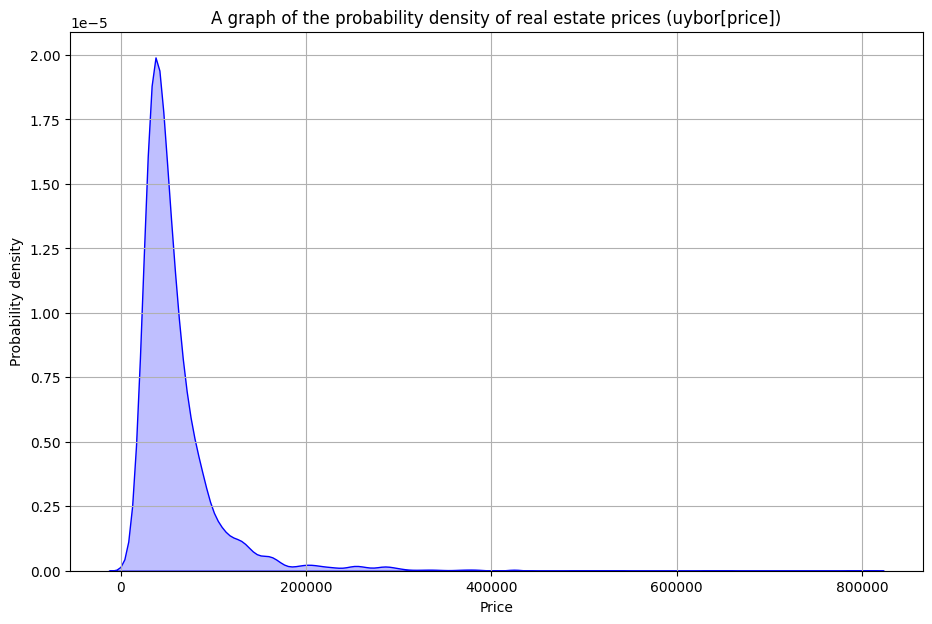

In [51]:
plt.figure(figsize=(11, 7))
sns.kdeplot(uybor['price'], shade=True, color='blue')
plt.xlabel('Price')
plt.ylabel('Probability density')
plt.title('A graph of the probability density of real estate prices (uybor[price])')
plt.grid(True)
plt.show()

<ipython-input-52-e19b411805b2>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, shade=True, color='blue')


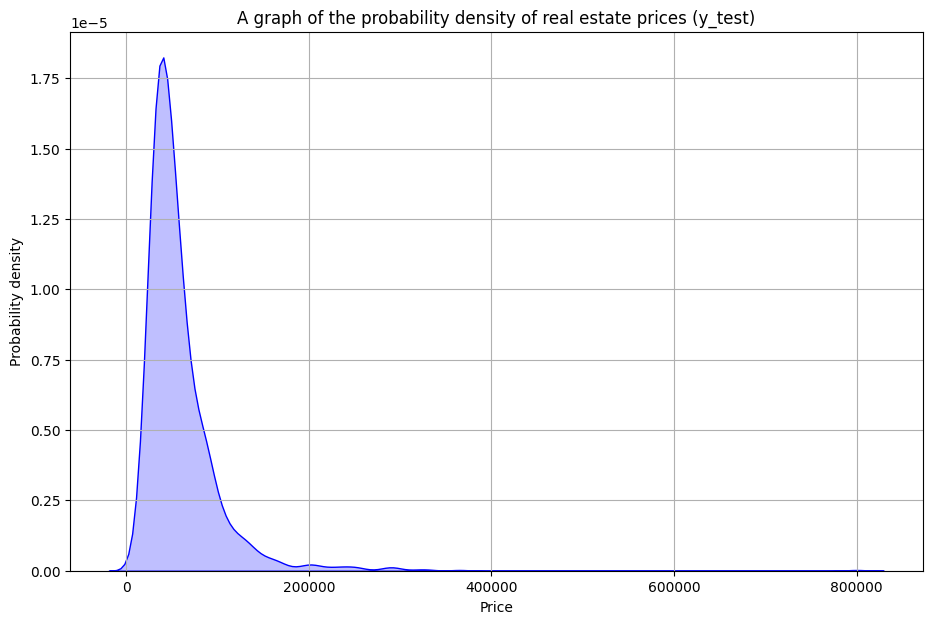

In [52]:
plt.figure(figsize=(11, 7))
sns.kdeplot(y_test, shade=True, color='blue')
plt.xlabel('Price')
plt.ylabel('Probability density')
plt.title('A graph of the probability density of real estate prices (y_test)')
plt.grid(True)
plt.show()